In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
torch.set_printoptions(sci_mode=False)

fmnist_dataset = datasets.FashionMNIST('./data', train=True, download=True)
device = torch.device('gpu' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 tensor(1))

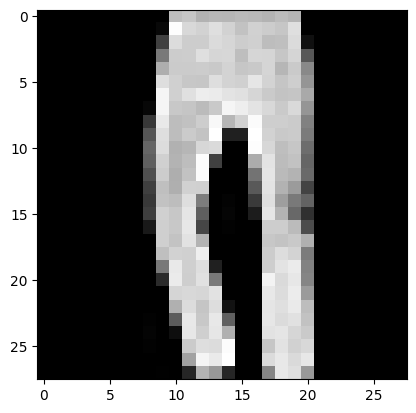

In [4]:
ix = np.random.randint(len(fmnist_dataset.data))
ix = 24300

x = fmnist_dataset.data[ix]

plt.imshow(x, cmap='gray')
fmnist_dataset.classes, fmnist_dataset.targets[ix]

In [5]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.25),
            nn.Linear(28*28, 500),
            nn.Dropout(0.25),
            nn.BatchNorm1d(500),
            nn.ReLU(),

            nn.Linear(500, 10),
        )

    def forward(self, x):
        x = x.float().to(device)
        x = self.fc(x)
        return x
    
model = SimpleNN()
model.load_state_dict(torch.load('./mymodel.pt', weights_only=True))

<All keys matched successfully>

In [35]:
model.eval()

predictions = []

for px in range(-5, 6):
    data = torch.roll(x / 255, px)
    _y  =model(data[None]).squeeze(0)
    predictions.append([_y.softmax(dim=-1), _y.argmax(dim=-1).item(), px])

for prediction in predictions:
    print(f"""
Softmax: {prediction[0]}
Argmax: {prediction[1]} - {fmnist_dataset.classes[prediction[1]]}
Shifted by: {prediction[2]}px
    """)
    print('\n')


Softmax: tensor([    0.0215,     0.0001,     0.0660,     0.1195,     0.0118,     0.0000,
            0.7810,     0.0000,     0.0001,     0.0000],
       grad_fn=<SoftmaxBackward0>)
Argmax: 6 - Shirt
Shifted by: -5px
    



Softmax: tensor([    0.0295,     0.0002,     0.0415,     0.2336,     0.0710,     0.0000,
            0.6241,     0.0000,     0.0001,     0.0000],
       grad_fn=<SoftmaxBackward0>)
Argmax: 6 - Shirt
Shifted by: -4px
    



Softmax: tensor([    0.0695,     0.0298,     0.0194,     0.4458,     0.3013,     0.0000,
            0.1340,     0.0000,     0.0002,     0.0000],
       grad_fn=<SoftmaxBackward0>)
Argmax: 3 - Dress
Shifted by: -3px
    



Softmax: tensor([    0.0000,     0.9993,     0.0000,     0.0005,     0.0002,     0.0000,
            0.0000,     0.0000,     0.0000,     0.0000],
       grad_fn=<SoftmaxBackward0>)
Argmax: 1 - Trouser
Shifted by: -2px
    



Softmax: tensor([    0.0000,     1.0000,     0.0000,     0.0000,     0.0000,     0.0000,
            

<Axes: >

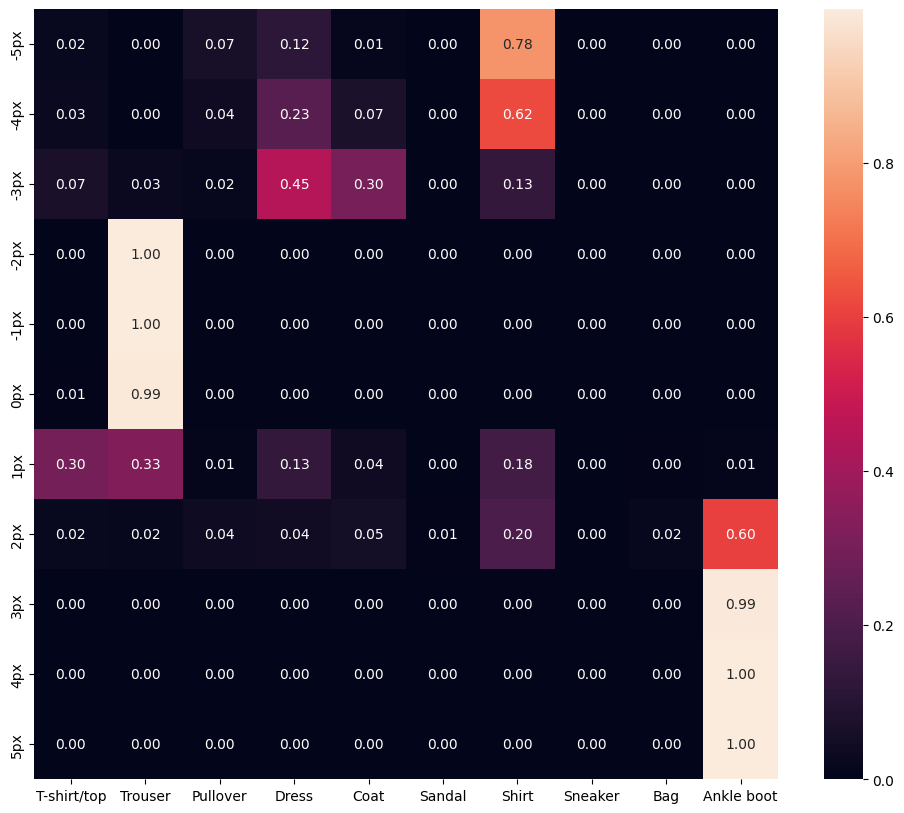

In [48]:
preds = np.array([p[0].detach() for p in predictions])

fig, axs = plt.subplots(1,1, figsize=(12, 10))
sns.heatmap(
    preds,
    annot=True,
    ax=axs,
    fmt='.2f',
    xticklabels=fmnist_dataset.classes,
    yticklabels=[f'{i}px' for i in range(-5, 6)],
    # cmap='gray'
)